## Preliminary Data Cleaning and EDA

 ## The goals of this notebook are the following:
- clean dataset and resolve any missing values.
- identify any other issues (outliers,wrong dtypes,etc..)and resolve accordingly.
- save final clean dataset to a csv file for futher EDA,analysis, and model building.
- identify any major issues with target feature such as class imbalance.
- become familiar with dataset through EDA.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import scipy.stats as scs
pd.set_option('display.max_columns', 500)
#importing necessary libraries

In [2]:
df=pd.read_csv('train.csv') #importing dataset

In [3]:
df.head() #first 5 rows of dataset

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.shape #shape of dataset before cleaning

(233154, 41)

In [5]:
df.dtypes #checking dtypes of features
# will need to deal with object categories

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [6]:
df.isna().any() #checking for missing values

UniqueID                               False
disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
supplier_id                            False
manufacturer_id                        False
Current_pincode_ID                     False
Date.of.Birth                          False
Employment.Type                         True
DisbursalDate                          False
State_ID                               False
Employee_code_ID                       False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS.SCORE                      False
PERFORM_CNS.SCORE.DESCRIPTION          False
PRI.NO.OF.ACCTS                        False
PRI.ACTIVE

In [7]:
len(df[df['Employment.Type'].isna()==True])/len(df)
#checking how many missing values relative to entire dataset

0.0328581109481287

In [8]:
drops_index=df[df['Employment.Type'].isna()==True].index
#taking the index of missing value rows

In [9]:
df.drop(axis=0,labels=drops_index,inplace=True)
#dropping rows with missing values
#since 97% of rows are valid, dropping final 3% is a good solution

In [10]:
df.shape #shape of dataset after cleaning

(225493, 41)

In [11]:
df.isna().any().sum() #confirming no nulls remaining in dataset

0

In [12]:
cols=df.columns.tolist() #complete feature list
print(cols)

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default']


In [13]:
df.describe() #checking values for all features

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,225493.000000,225493.00000,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.0,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000
mean,535677.453783,54240.72883,7.563113e+04,74.806634,73.070614,19645.597890,69.072251,3375.718133,7.241551,1550.665453,1.0,0.837720,0.077386,0.147127,0.023686,0.002138,293.040449,2.462360,1.053767,0.158989,1.684813e+05,2.220736e+05,2.216098e+05,0.060122,0.028214,0.007362,5.569682e+03,7.489187e+03,7.371104e+03,1.299246e+04,3.256845e+02,0.386602,0.098708,0.208845,0.217155
std,68337.222749,12775.59006,1.852758e+04,11.441890,70.014147,3494.023799,22.164680,2253.216519,4.460856,975.664631,0.0,0.368708,0.267204,0.354233,0.152069,0.046184,338.874784,5.223012,1.952015,0.553415,9.516692e+05,2.411722e+06,2.414697e+06,0.633104,0.318946,0.112301,1.729281e+05,1.860432e+05,1.854703e+05,1.497084e+05,1.575617e+04,0.959668,0.386376,0.710085,0.412310
min,417428.000000,13320.00000,3.700000e+04,13.500000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476481.000000,47049.00000,6.562500e+04,68.960000,14.000000,16555.000000,48.000000,1509.000000,4.000000,713.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535593.000000,53703.00000,7.080700e+04,76.890000,61.000000,20333.000000,86.000000,2949.000000,6.000000,1452.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,594774.000000,60213.00000,7.896600e+04,83.730000,130.000000,23004.000000,86.000000,5682.000000,10.000000,2365.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,680.000000,3.000000,1.000000,0.000000,3.630000e+04,6.490000e+04,6.299000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.045000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,987354.00000,1.328954e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [14]:
categoricals=[]
for col in df.columns: #Checking for categorical features
    if df[col].dtype=='object':
        print(col)
        categoricals.append(col)
    else:
        pass

Date.of.Birth
Employment.Type
DisbursalDate
PERFORM_CNS.SCORE.DESCRIPTION
AVERAGE.ACCT.AGE
CREDIT.HISTORY.LENGTH


In [15]:
print(df[categoricals[0]].value_counts())
df[categoricals[1]].value_counts() 
#checking values for first two catgeorical features

01-01-88    2143
01-01-90    2139
01-01-87    2107
01-01-86    2023
01-01-85    1975
            ... 
20-06-59       1
20-03-58       1
03-08-57       1
03-04-60       1
06-07-55       1
Name: Date.of.Birth, Length: 14417, dtype: int64


Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [16]:
df['Date.of.Birth']=pd.to_datetime(df['Date.of.Birth'])
#DOB should be a datetime object

In [17]:
df['Date.of.Birth'].head()

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-09-12
Name: Date.of.Birth, dtype: datetime64[ns]

In [18]:
df['Employment.Type']=np.where(df['Employment.Type']=='Salaried',1,0)

In [19]:
print(df['Employment.Type'].dtype)
df['Employment.Type'].value_counts() 
#confriming employment type is now binary integer feature

int64


0    127635
1     97858
Name: Employment.Type, dtype: int64

In [20]:
print(df[categoricals[2]].value_counts())
df[categoricals[3]].value_counts() #checking next two categorical features

31-10-18    8538
31-08-18    6473
24-10-18    6428
23-10-18    6183
26-10-18    5953
            ... 
26-08-18     684
12-08-18     556
13-09-18     315
05-08-18      41
02-10-18      25
Name: DisbursalDate, Length: 84, dtype: int64


No Bureau History Available                                111773
C-Very Low Risk                                             15715
A-Very Low Risk                                             13790
D-Very Low Risk                                             11134
B-Very Low Risk                                              9032
M-Very High Risk                                             8632
F-Low Risk                                                   8309
K-High Risk                                                  8107
H-Medium Risk                                                6695
E-Low Risk                                                   5695
I-Medium Risk                                                5440
G-Low Risk                                                   3902
Not Scored: Sufficient History Not Available                 3671
J-High Risk                                                  3667
Not Scored: Not Enough Info available on the customer        3557
Not Scored

In [21]:
df.DisbursalDate=pd.to_datetime(df['DisbursalDate'])
#converting to datetime object

In [22]:
df.DisbursalDate.dtype

dtype('<M8[ns]')

In [23]:
df.shape

(225493, 41)

### For the  PERFORM CNS Score Description, I decided to combine all catgeories that had no score or no history into one catgory. Then, I will code all of the remaining categories into binary features using get_dummies.

In [24]:
conds=[df['PERFORM_CNS.SCORE.DESCRIPTION']=='No Bureau History Available',
       df['PERFORM_CNS.SCORE.DESCRIPTION']=='Not Scored: Sufficient History Not Available',
       df['PERFORM_CNS.SCORE.DESCRIPTION']=='Not Scored: Not Enough Info available on the customer',
       df['PERFORM_CNS.SCORE.DESCRIPTION']=='Not Scored: No Activity seen on the customer (Inactive)',
       df['PERFORM_CNS.SCORE.DESCRIPTION']=='Not Scored: Only a Guarantor',
       df['PERFORM_CNS.SCORE.DESCRIPTION']=='Not Scored: No Updates available in last 36 months',
       df['PERFORM_CNS.SCORE.DESCRIPTION']=='Not Scored: More than 50 active Accounts found'
      ]
#The purpose of this cell and the next is to use np.select to make all the 
#unscored categories into one 

In [25]:
choices=['No Score/No History','No Score/No History','No Score/No History','No Score/No History'
         ,'No Score/No History','No Score/No History','No Score/No History']
df['PERFORM_CNS.SCORE.DESCRIPTION']=np.select(conds,choices,default=df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [26]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts() #remaining category counts

No Score/No History    124253
C-Very Low Risk         15715
A-Very Low Risk         13790
D-Very Low Risk         11134
B-Very Low Risk          9032
M-Very High Risk         8632
F-Low Risk               8309
K-High Risk              8107
H-Medium Risk            6695
E-Low Risk               5695
I-Medium Risk            5440
G-Low Risk               3902
J-High Risk              3667
L-Very High Risk         1122
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [27]:
dummies=pd.get_dummies(df['PERFORM_CNS.SCORE.DESCRIPTION'],drop_first=True)
dummies #Perform CNS Score Description values as binary features

,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Score/No History
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,0,0,1,0,0,0,0,0,0,0,0,0,0
233150,0,0,0,0,0,0,0,0,0,0,0,0,0
233151,0,0,0,0,0,0,0,0,0,0,0,0,1
233152,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
print(df[categoricals[4]].value_counts()) #remaining two categories
df[categoricals[5]].value_counts()

0yrs 0mon     114135
0yrs 6mon       5907
0yrs 7mon       5254
0yrs 11mon      5110
0yrs 10mon      5005
               ...  
16yrs 3mon         1
14yrs 2mon         1
14yrs 5mon         1
13yrs 2mon         1
15yrs 3mon         1
Name: AVERAGE.ACCT.AGE, Length: 192, dtype: int64


0yrs 0mon     113894
0yrs 6mon       4670
2yrs 1mon       4596
0yrs 7mon       3952
2yrs 0mon       3711
               ...  
26yrs 8mon         1
18yrs 8mon         1
19yrs 4mon         1
28yrs 1mon         1
19yrs 0mon         1
Name: CREDIT.HISTORY.LENGTH, Length: 291, dtype: int64

### The methodology to fix these two columns is actually identical because these cols are formatted exactly the same. The first apply gets rid of all of the non-numerical characters from each row and the next then takes these values to calculate these metrics in years.

In [29]:
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda x:x.replace('yrs','').replace('mon','').split(' '))

In [30]:
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda x:(int(x[0])+(float(x[1])/12)))

In [31]:
df['AVERAGE.ACCT.AGE'].dtype

dtype('float64')

In [32]:
df['AVERAGE.ACCT.AGE'].value_counts()

0.000000     114135
0.500000       5907
0.583333       5254
0.916667       5110
0.833333       5005
              ...  
30.750000         1
22.500000         1
13.166667         1
15.166667         1
14.416667         1
Name: AVERAGE.ACCT.AGE, Length: 192, dtype: int64

In [33]:
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x:x.replace('yrs','').replace('mon','').split(' '))

In [34]:
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x:(int(x[0])+(float(x[1])/12)))

In [35]:
df['CREDIT.HISTORY.LENGTH'].dtype

dtype('float64')

In [36]:
df['CREDIT.HISTORY.LENGTH'].value_counts()

0.000000     113894
0.500000       4670
2.083333       4596
0.583333       3952
2.000000       3711
              ...  
35.250000         1
19.333333         1
22.833333         1
19.000000         1
39.000000         1
Name: CREDIT.HISTORY.LENGTH, Length: 291, dtype: int64

In [37]:
test_df=pd.concat([df,dummies],axis=1) #adding categorical categories after encoding

In [38]:
test_df.drop(axis=1,labels='PERFORM_CNS.SCORE.DESCRIPTION',inplace=True)
#feature is now redundant after encoding categorical features

In [39]:
test_df.shape #shape of resulting dataset

(225493, 53)

In [40]:
test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Score/No History
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,2018-03-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
test_df.to_csv('Cleaned_Loan_Dataset.csv') #saving to csv

In [42]:
df=pd.read_csv('Cleaned_Loan_Dataset.csv',index_col=0) #importing new csv

In [43]:
df.head() #testing to make sure data is correct

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Score/No History
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,2018-03-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
df.shape

(225493, 53)

In [45]:
df.isna().any().sum() #confirming no null or missing values

0

In [46]:
df.dtypes #checking dtypes of features

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                          int64
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.AC

In [47]:
df['Date.of.Birth']=pd.to_datetime(df['Date.of.Birth']) #converting to datetime object

In [48]:
df['DisbursalDate']=pd.to_datetime(df['DisbursalDate']) #converting to datetime object

In [49]:
df.dtypes #new dtypes of cols

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                 int64
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [50]:
df.describe() #checking feature distributions 

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Score/No History
count,225493.000000,225493.00000,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.0,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000
mean,535677.453783,54240.72883,7.563113e+04,74.806634,73.070614,19645.597890,69.072251,3375.718133,0.433974,7.241551,1550.665453,1.0,0.837720,0.077386,0.147127,0.023686,0.002138,293.040449,2.462360,1.053767,0.158989,1.684813e+05,2.220736e+05,2.216098e+05,0.060122,0.028214,0.007362,5.569682e+03,7.489187e+03,7.371104e+03,1.299246e+04,3.256845e+02,0.386602,0.098708,0.752359,1.371091,0.208845,0.217155,0.040054,0.069692,0.049376,0.025256,0.036848,0.017304,0.029691,0.024125,0.016262,0.035952,0.004976,0.038281,0.551028
std,68337.222749,12775.59006,1.852758e+04,11.441890,70.014147,3494.023799,22.164680,2253.216519,0.495622,4.460856,975.664631,0.0,0.368708,0.267204,0.354233,0.152069,0.046184,338.874784,5.223012,1.952015,0.553415,9.516692e+05,2.411722e+06,2.414697e+06,0.633104,0.318946,0.112301,1.729281e+05,1.860432e+05,1.854703e+05,1.497084e+05,1.575617e+04,0.959668,0.386376,1.263468,2.389739,0.710085,0.412310,0.196087,0.254627,0.216653,0.156901,0.188389,0.130403,0.169732,0.153437,0.126482,0.186172,0.070364,0.191873,0.497390
min,417428.000000,13320.00000,3.700000e+04,13.500000,1.000000,10524.000000,45.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476481.000000,47049.00000,6.562500e+04,68.960000,14.000000,16555.000000,48.000000,1509.000000,0.000000,4.000000,713.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,535593.000000,53703.00000,7.080700e+04,76.890000,61.000000,20333.000000,86.000000,2949.000000,0.000000,6.000000,1452.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [51]:
df['loan_default'].value_counts(normalize=True) 
#checking for class imbalance, imbalance is an issue, will have to resolve during modeling

0    0.782845
1    0.217155
Name: loan_default, dtype: float64

In [52]:
corrs_dict={} #checking correlations of all features with target (car loan defaults)
for col in df.columns:
    try:
        corr=df['loan_default'].corr(df[col])
    except TypeError:
        pass
    finally:
        corrs_dict[corr]=col
sorted(corrs_dict.items(),reverse=True)

[(0.09799584257485422, 'ltv'),
 (nan, 'MobileNo_Avl_Flag'),
 (1.0, 'loan_default'),
 (0.07928591815319243, 'disbursed_amount'),
 (0.05003160431807404, 'State_ID'),
 (0.04577815893532917, 'VoterID_flag'),
 (0.04384384502691756, 'NO.OF_INQUIRIES'),
 (0.04195959642149889, 'M-Very High Risk'),
 (0.04092642081554834, 'PRI.OVERDUE.ACCTS'),
 (0.035870890518381084, 'No Score/No History'),
 (0.034506503458845296, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'),
 (0.033665889338817014, 'UniqueID'),
 (0.03050039179846531, 'branch_id'),
 (0.029826405191153645, 'Date.of.Birth'),
 (0.028512651612713505, 'K-High Risk'),
 (0.027569478291240065, 'supplier_id'),
 (0.021147227839655763, 'I-Medium Risk'),
 (0.02090301497828511, 'Employee_code_ID'),
 (0.015619585600699726, 'asset_cost'),
 (0.011198841386139892, 'J-High Risk'),
 (0.011059773878401182, 'L-Very High Risk'),
 (0.010084949827765902, 'H-Medium Risk'),
 (0.002078687032639728, 'PAN_flag'),
 (-0.0014531992990018847, 'SEC.INSTAL.AMT'),
 (-0.00148242125259843

In [53]:
cols_box=[] #make list of 'float' add 'int' type features for box plots
for col in df.columns:
    if df[col].dtype=='float' or df[col].dtype=='int':
        cols_box.append(col)
    else:
        pass

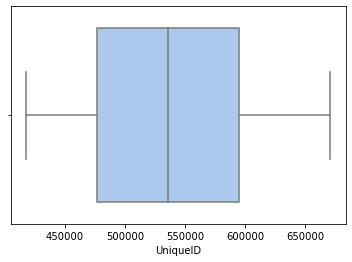

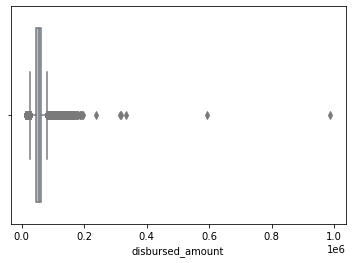

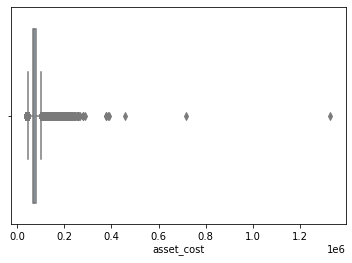

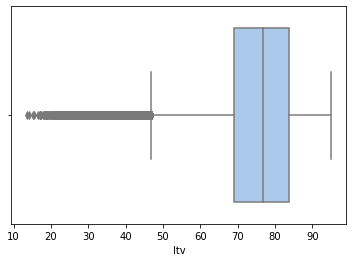

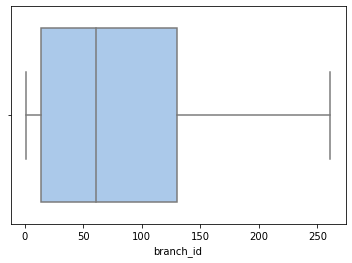

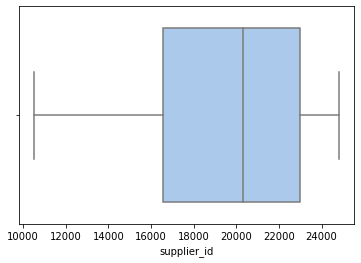

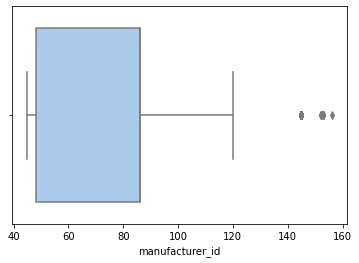

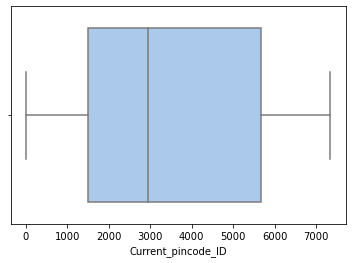

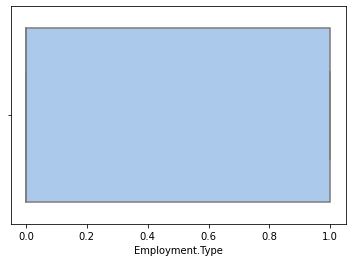

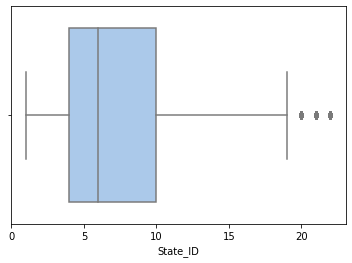

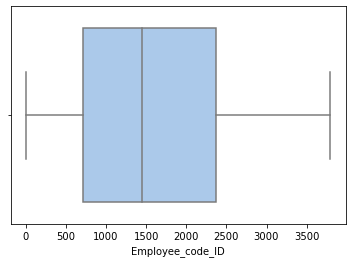

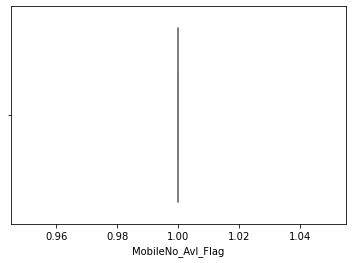

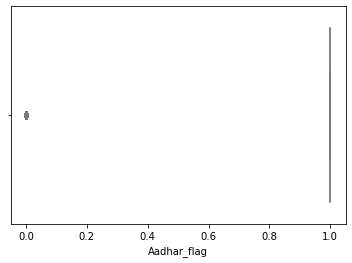

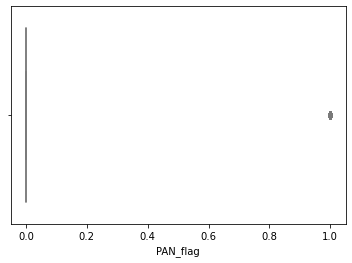

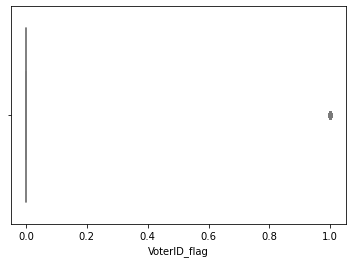

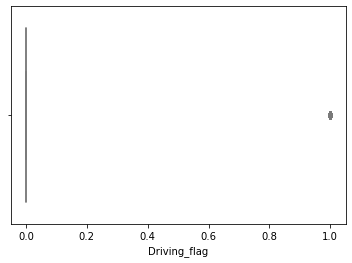

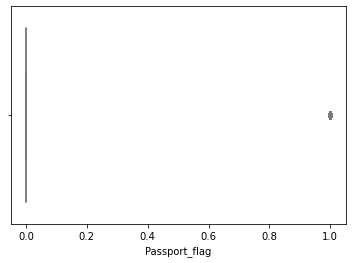

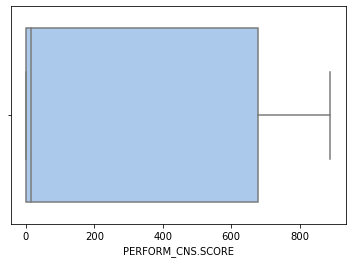

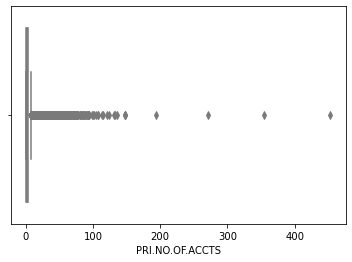

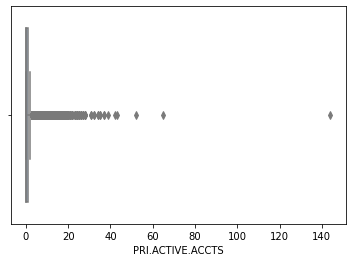

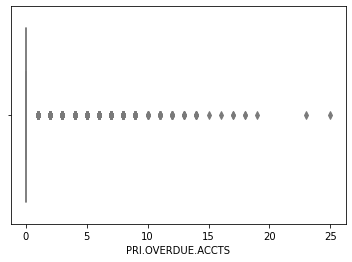

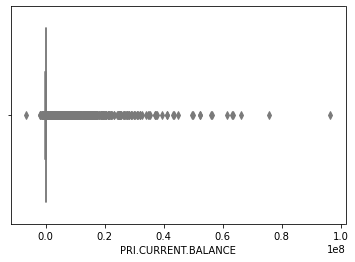

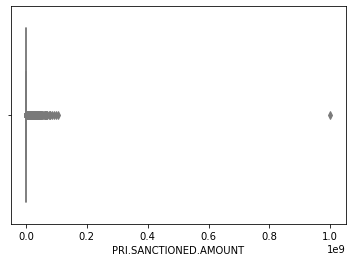

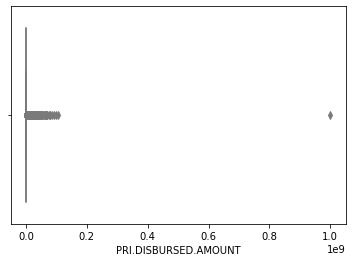

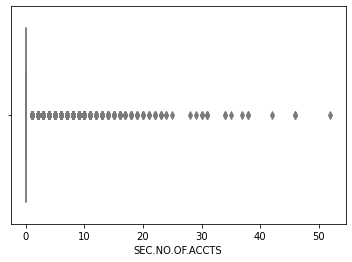

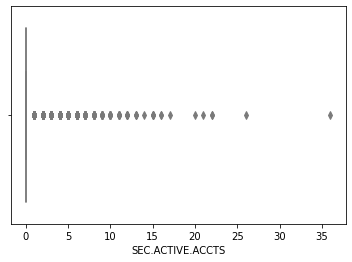

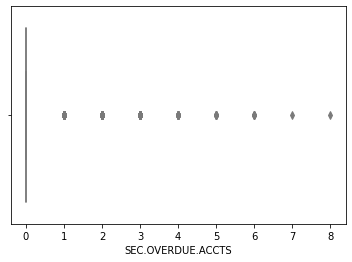

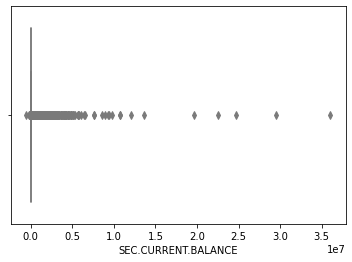

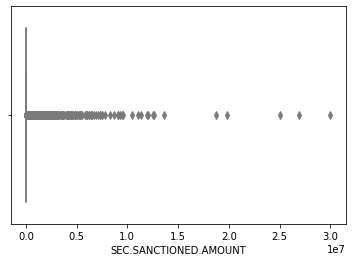

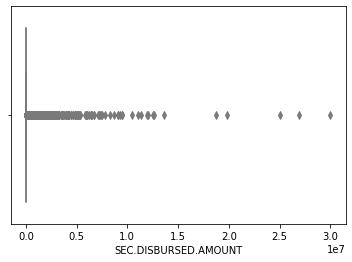

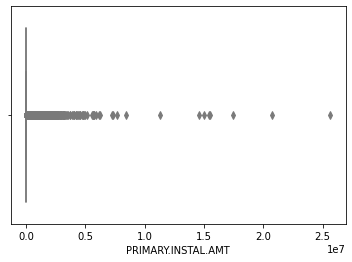

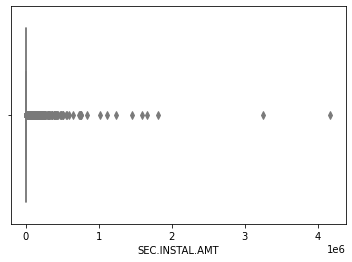

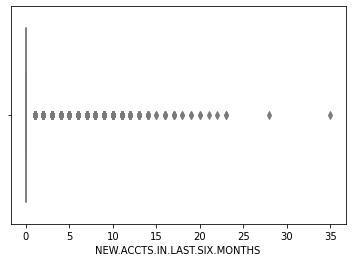

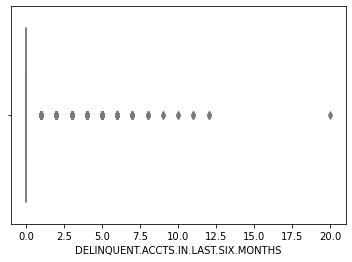

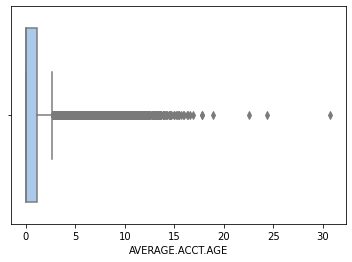

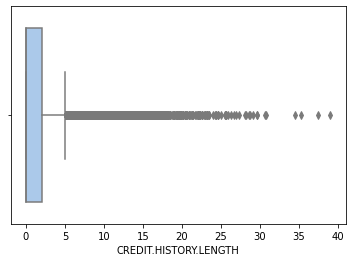

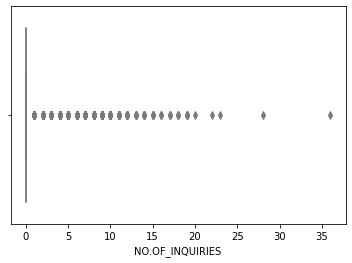

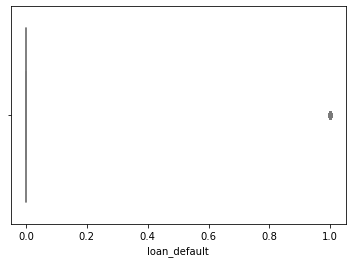

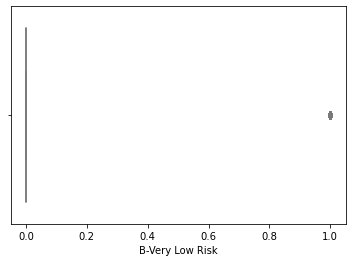

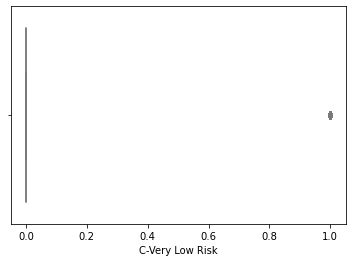

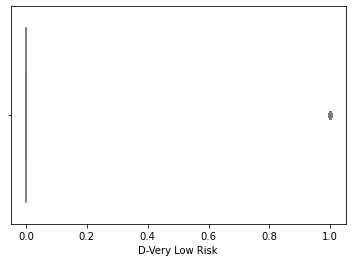

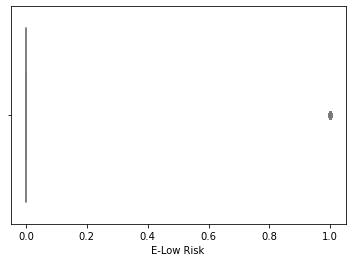

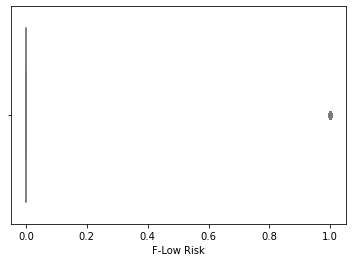

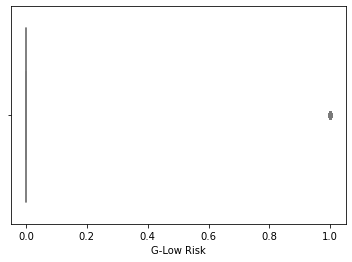

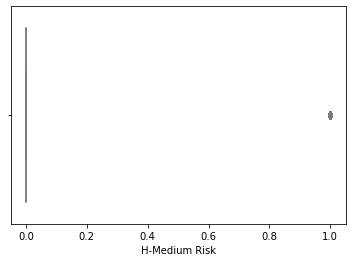

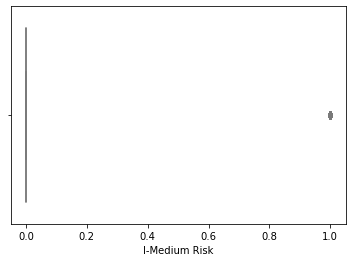

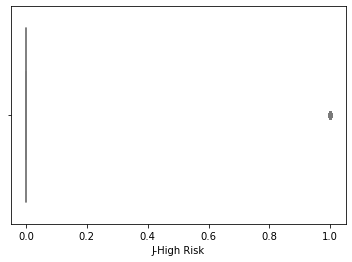

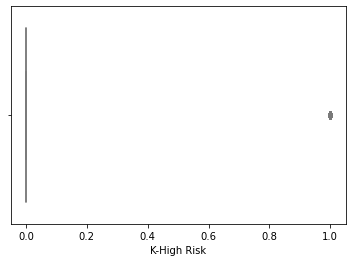

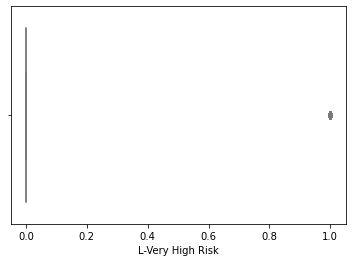

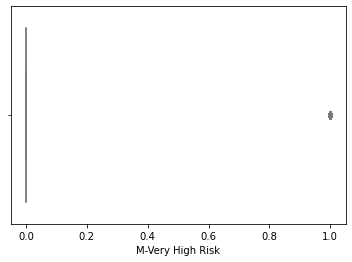

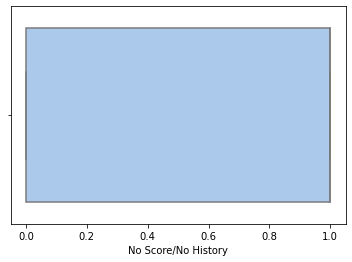

In [54]:
for col in cols_box:
    sns.boxplot(x=df[col],palette='pastel') #box plots to check for extreme values
    plt.show()

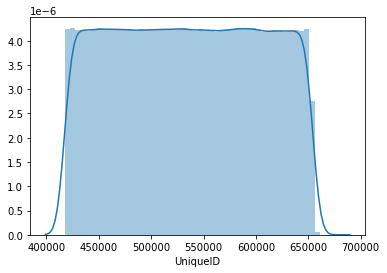

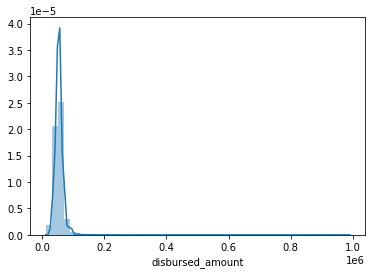

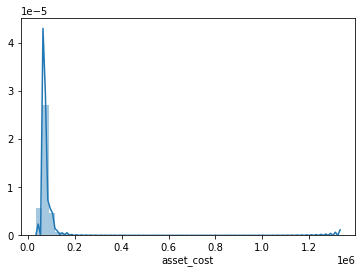

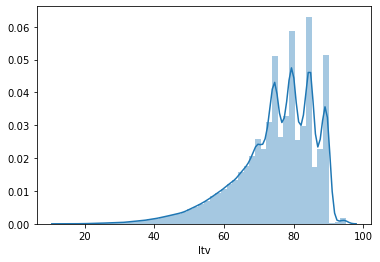

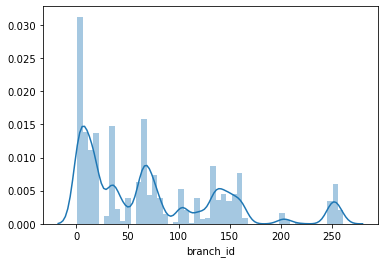

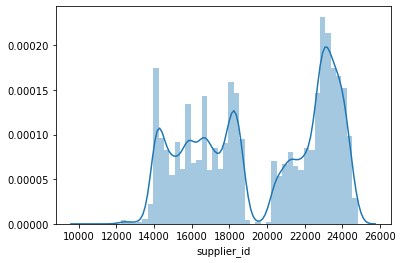

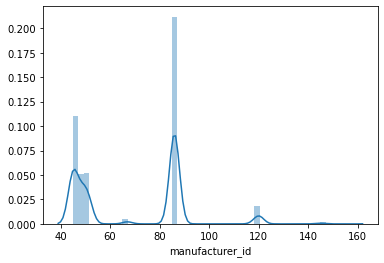

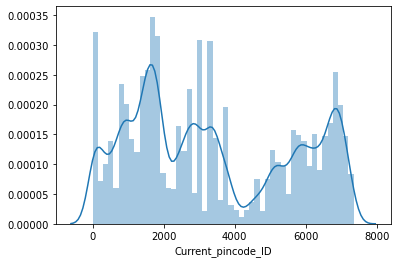

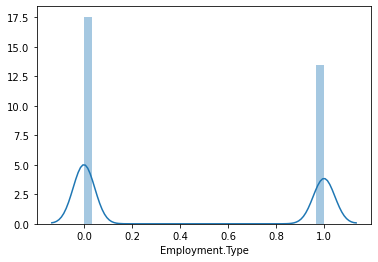

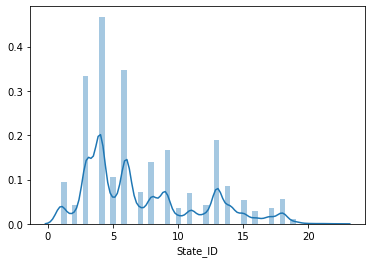

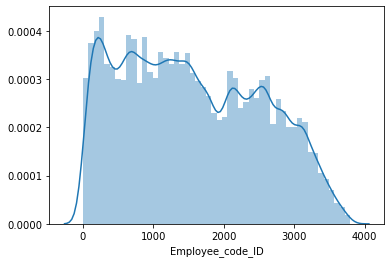

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


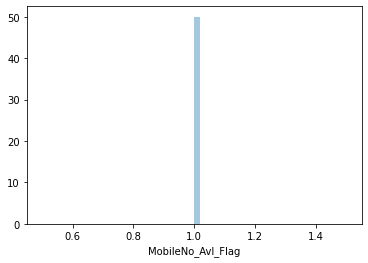

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


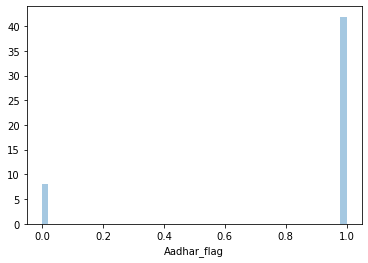

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


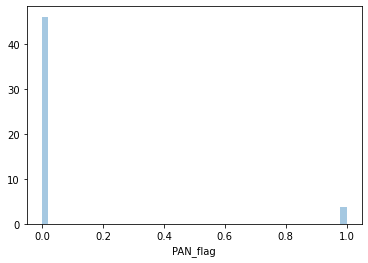

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


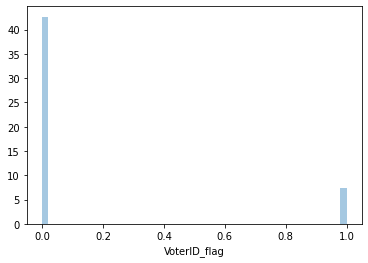

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


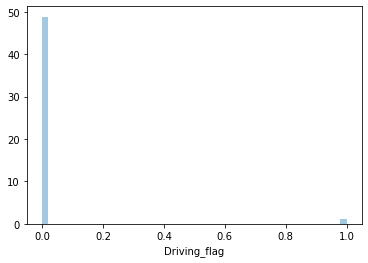

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


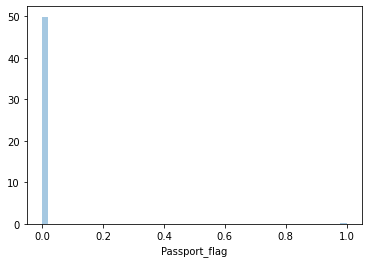

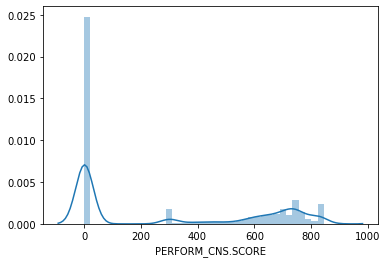

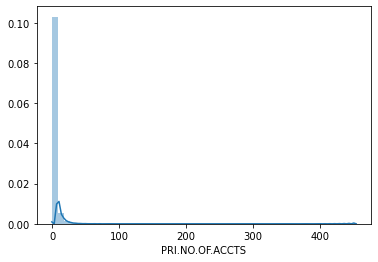

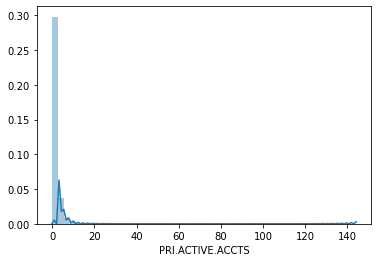

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


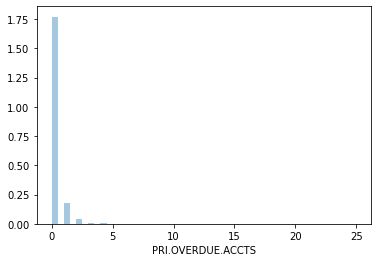

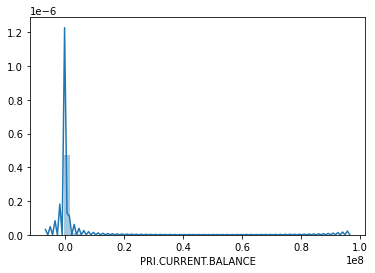

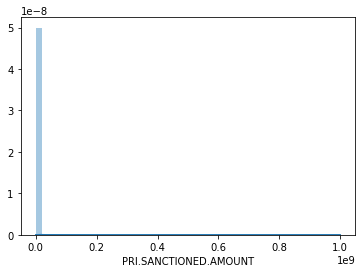

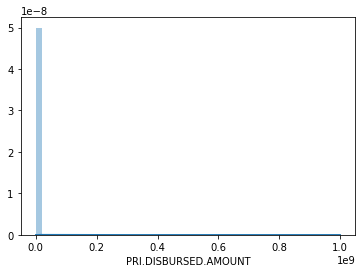

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


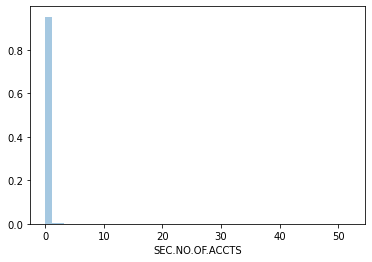

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


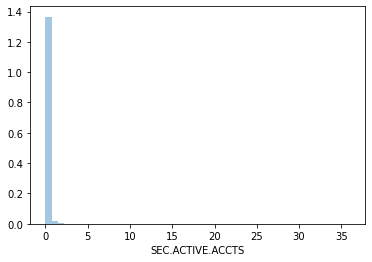

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


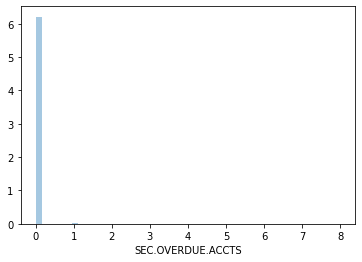

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


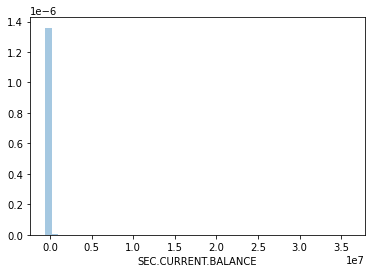

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


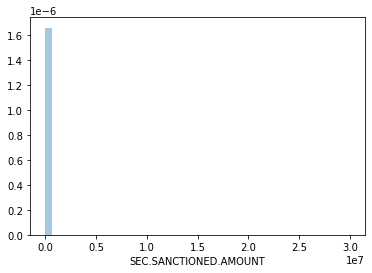

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


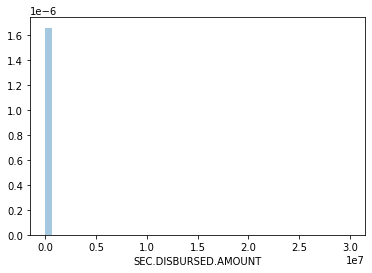

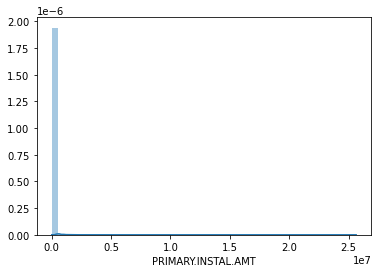

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


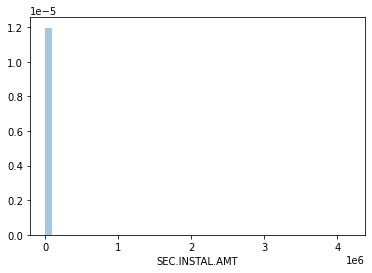

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


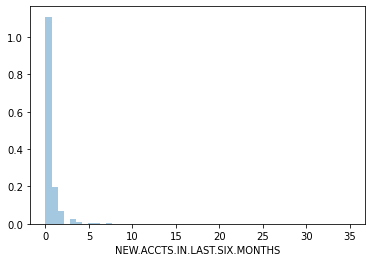

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


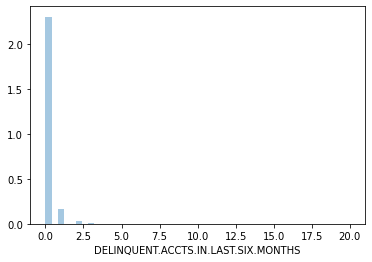

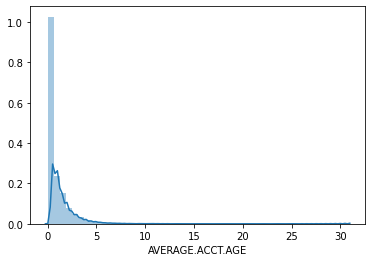

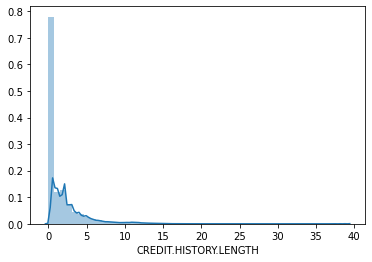

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


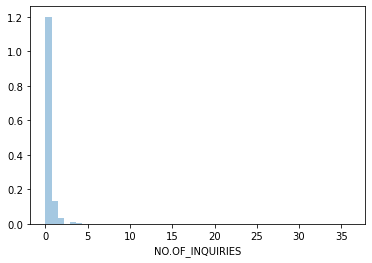

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


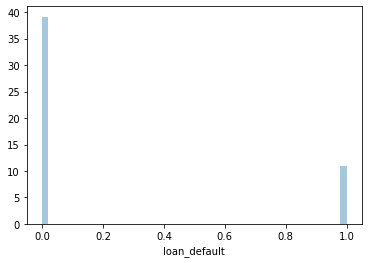

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


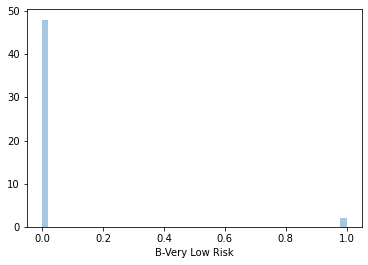

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


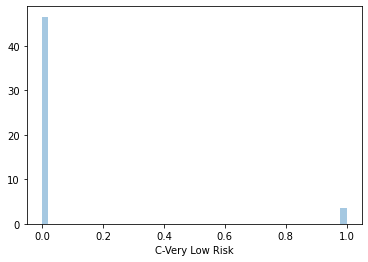

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


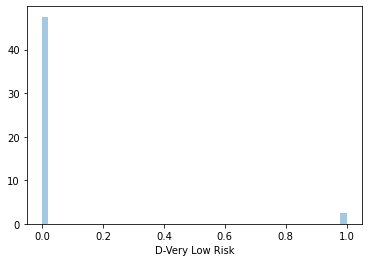

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


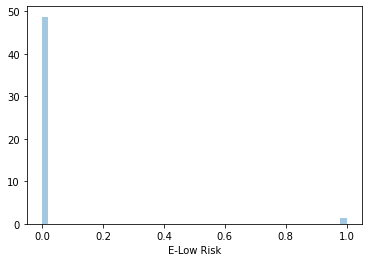

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


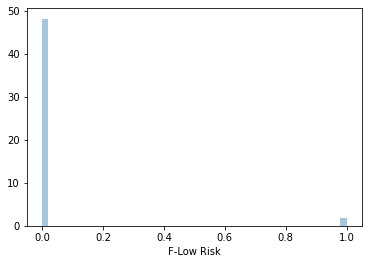

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


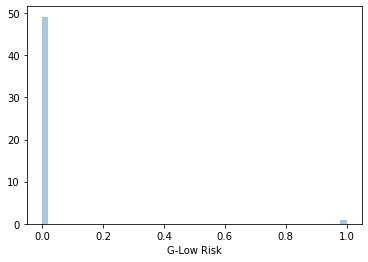

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


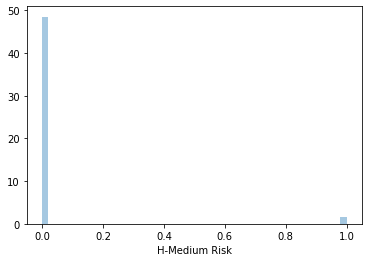

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


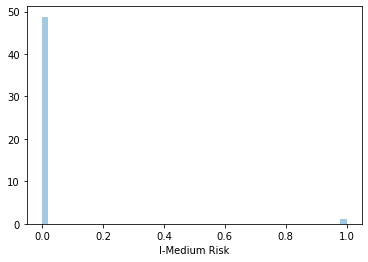

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


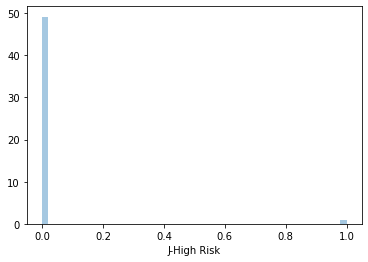

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


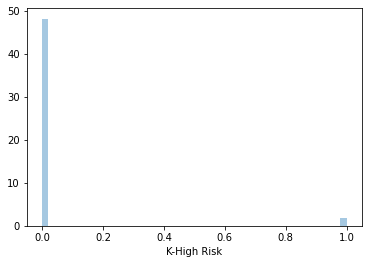

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


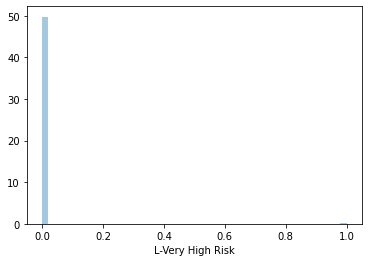

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


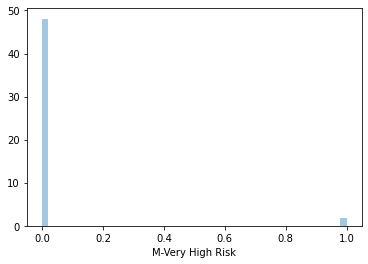

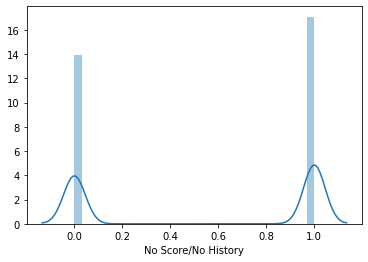

In [55]:
for col in cols_box:
    sns.distplot(df[col]) #another way to check distributions
    plt.show()

In [56]:
df.columns #current cols of dataset

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

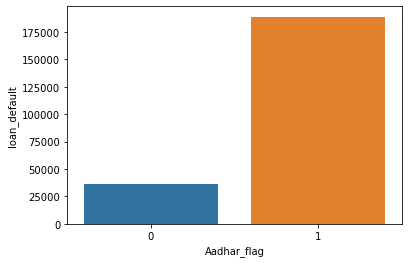

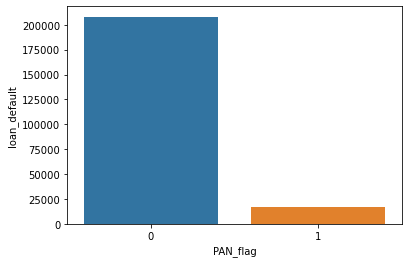

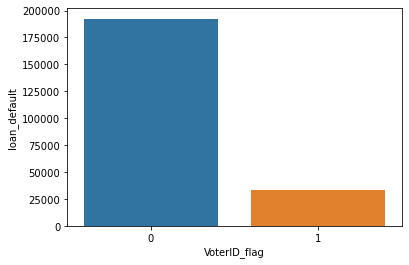

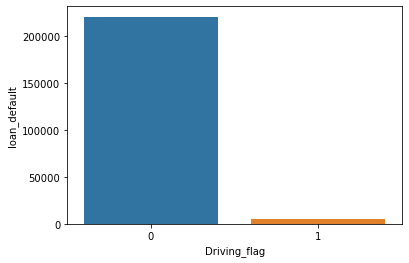

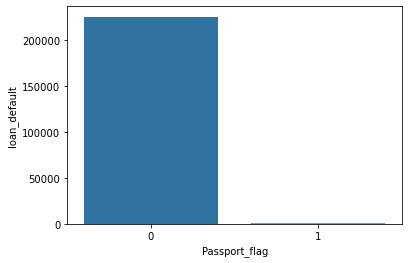

In [57]:
IDs=['Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag'] #want to see how ID affects loan default numbers
res=[]
for ID in IDs:
    y=df.groupby(ID).count()['loan_default']
    x=df.groupby(ID).count()['loan_default'].index
    sns.barplot(x,y)
    plt.show()

In [58]:
df.groupby('Aadhar_flag').count()['loan_default']

Aadhar_flag
0     36593
1    188900
Name: loan_default, dtype: int64

## Aadhar is an ID of twelve numbers that India gives to all it's citizens. However, though EDA, It is very obvious that there are more people who default using Aaddhar compared to any other ID used. Let's do a statistical test to confirm this.

## Statistical Test

# 2 Sample Means Test
## The goal of this test is to confirm whether or not there is a statisitically significant difference between borrowers who use Aadhar for ID and default versus the group that uses other IDs.


# Null and Alternative hypotheseses 
## Ho:  μ1= μ2
## Ha:  μ1≠ μ2

In [59]:
df.loc[df['Aadhar_flag']==1,'loan_default']

0         0
1         1
2         0
3         1
4         1
         ..
233147    0
233148    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 188900, dtype: int64

In [60]:
Aadhar_group_mean=np.mean(df.loc[df['Aadhar_flag']==1,'loan_default'])
Aadhar_group_std=np.std(df.loc[df['Aadhar_flag']==1,'loan_default'])
Aadhar_group_len=len(df.loc[df['Aadhar_flag']==1,'loan_default'])

In [61]:
Other_group_mean=np.mean(df.loc[df['Aadhar_flag']==0,'loan_default'])
Other_group_std=np.std(df.loc[df['Aadhar_flag']==0,'loan_default'])
Other_group_len=len(df.loc[df['Aadhar_flag']==0,'loan_default'])

In [62]:
num=Aadhar_group_mean-Other_group_mean
denom=np.sqrt((Aadhar_group_std**2/Aadhar_group_len)+(Other_group_std**2/Other_group_len))
Test_stat=num/denom

In [63]:
Test_stat

-19.666005065743658

In [64]:
p_val=1-scs.norm.sf(Test_stat)
p_val

0.0

## Assuming an alpha of .05, our p_value is much smaller than alpha. In fact, it is so small it has been rounded down to zero. Thus, we can reject the null hypothesis showing there is a very significant statistical difference in default rate between these groups. Thus, it will be interesting to see the impact of this feature during model. 

## Feature Engineering 
## The next feature is created due to the datetime method used above.   It will give us an age for all our borrowers so we can see how Age affects borrower's repay ability.

In [65]:
df['Age_at_disbursal']=(df['DisbursalDate']-df['Date.of.Birth'])

In [66]:
df['Age_at_disbursal'].value_counts()

11991 days     116
11621 days     113
11261 days     102
10895 days     101
12356 days     100
              ... 
-13792 days      1
-17121 days      1
7462 days        1
-14404 days      1
-14396 days      1
Name: Age_at_disbursal, Length: 15128, dtype: int64

## The next few cells show the code and methodology to convert the age column into a series of floats.

In [67]:
df['Age_at_disbursal']=df['Age_at_disbursal'].astype('str')
#casting series temporarily to a string to use string methods

In [68]:
df['Age_at_disbursal'].str.split(' ')[0][0] #testing string method

'12485'

In [69]:
df['Age_at_disbursal']=df['Age_at_disbursal'].apply(lambda x:x.split(' ')[0])
#seperating the numbers from characters using blank space

In [70]:
df['Age_at_disbursal']=df['Age_at_disbursal'].astype('float')
#now casting series to floats

In [71]:
df['Age_at_disbursal']=df['Age_at_disbursal']/365
#values were in days, converting to years

In [72]:
df['Age_at_disbursal'].head() #new correctly formatted version

0    34.205479
1    33.178082
2    32.397260
3    24.838356
4    41.065753
Name: Age_at_disbursal, dtype: float64

In [73]:
drops=df[df['Age_at_disbursal']<0].index 
#odd error where some dob were input as dates in the future, thus dropping those rows 
#since dataset is so large, dropping a small number of rows seems like best solution

In [74]:
df.drop(axis=0,labels=drops,inplace=True)

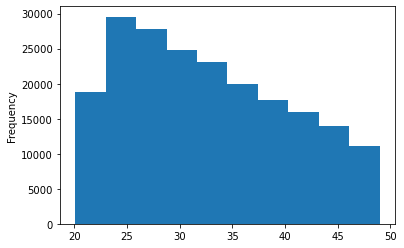

In [75]:
df['Age_at_disbursal'].plot(kind='hist') #distribution of feature

In [76]:
df.Age_at_disbursal.describe()

count    202679.000000
mean         32.692680
std           7.636310
min          20.104110
25%          26.142466
50%          31.673973
75%          38.687671
max          48.972603
Name: Age_at_disbursal, dtype: float64

In [77]:
df.shape #new shape of dataset

(202679, 54)

In [78]:
df.columns #feature list

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

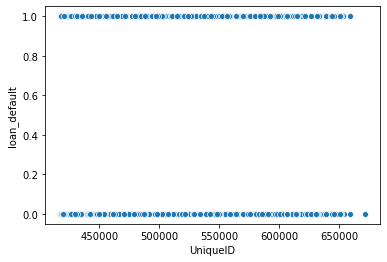

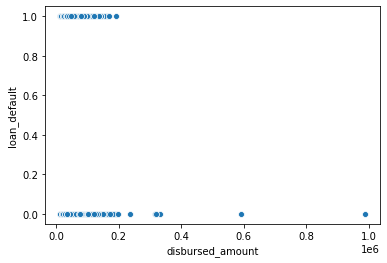

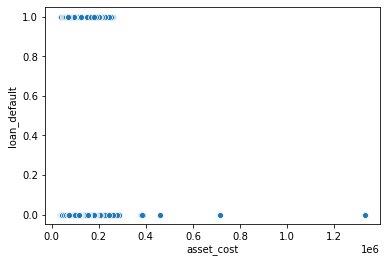

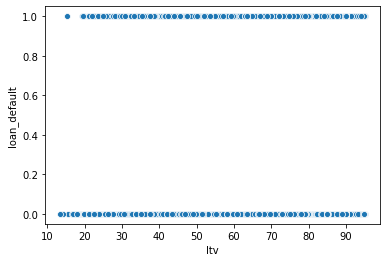

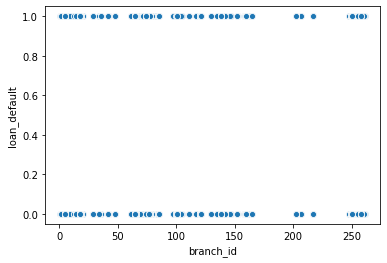

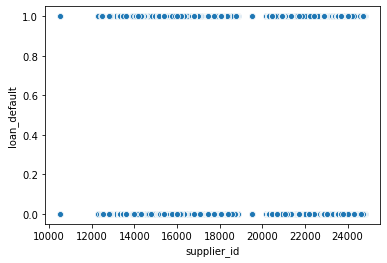

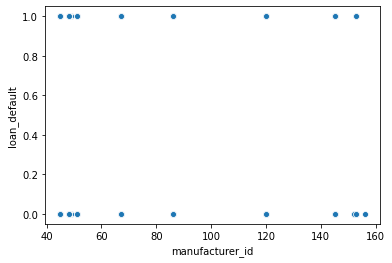

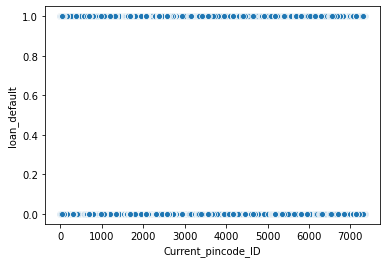

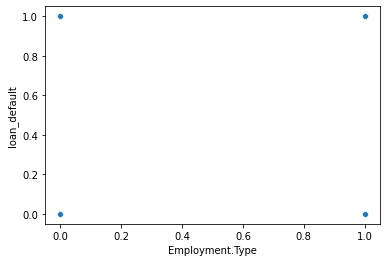

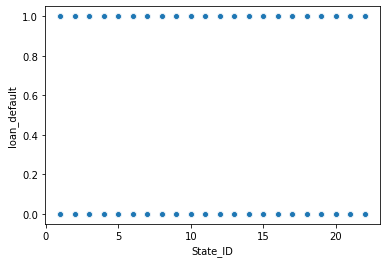

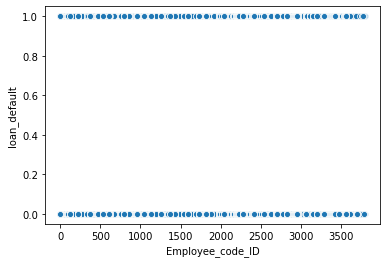

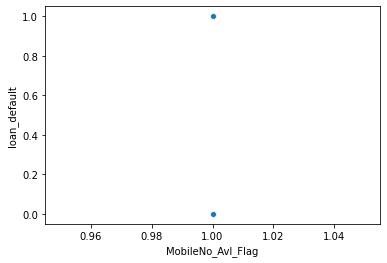

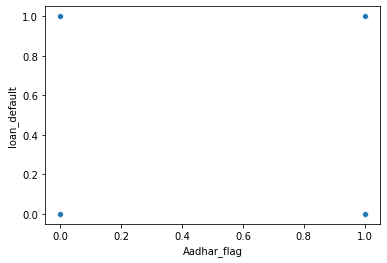

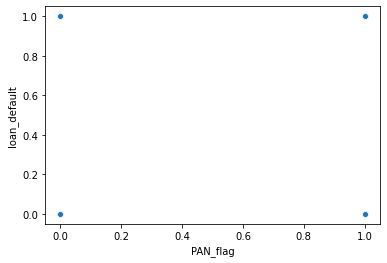

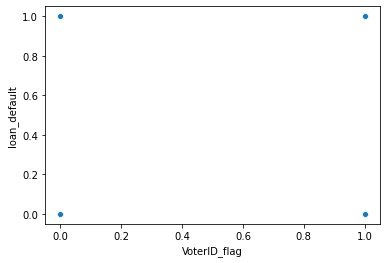

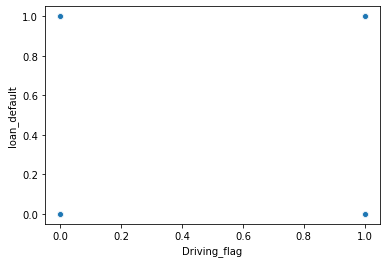

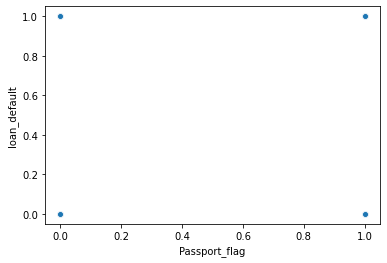

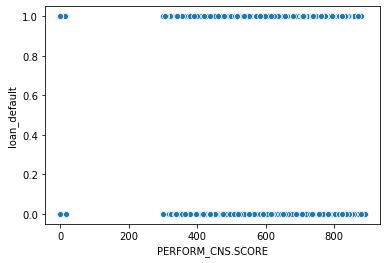

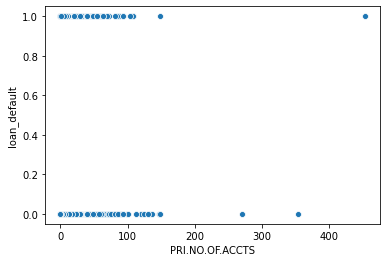

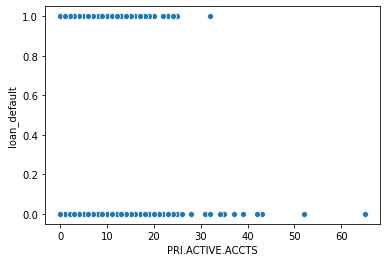

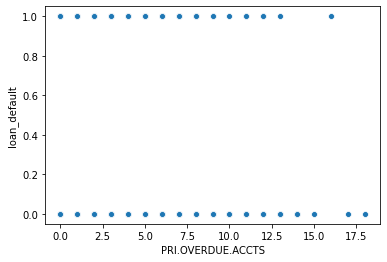

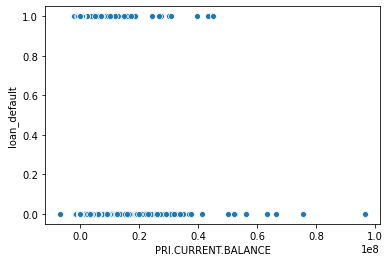

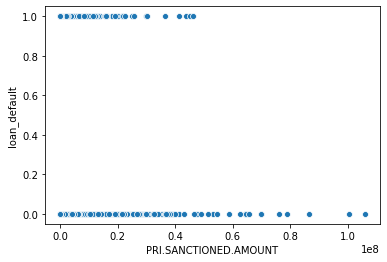

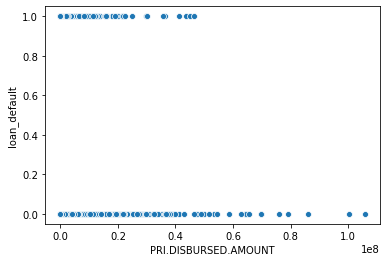

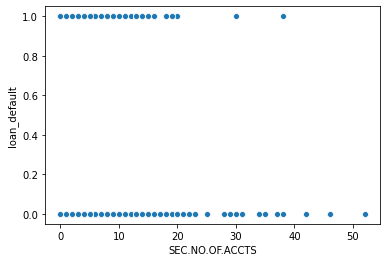

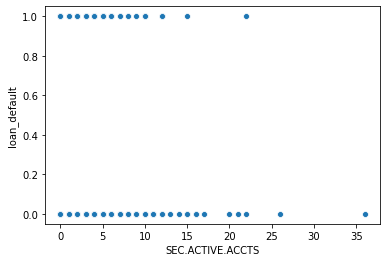

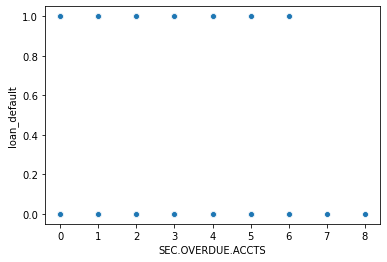

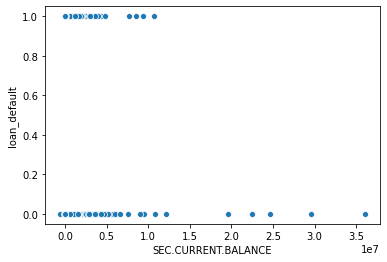

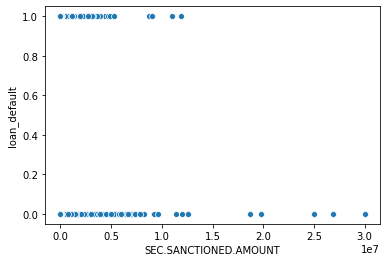

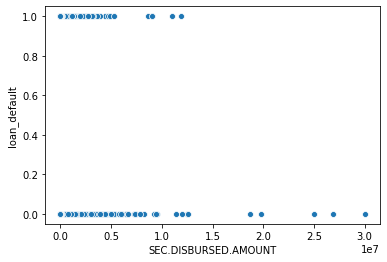

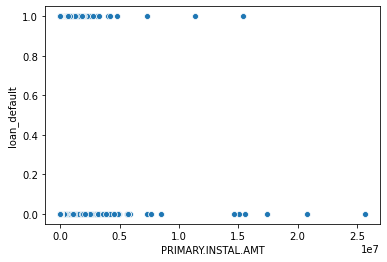

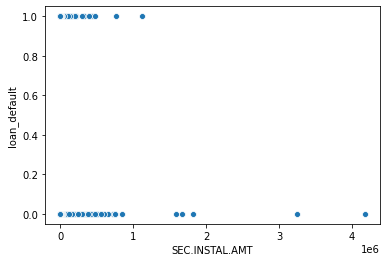

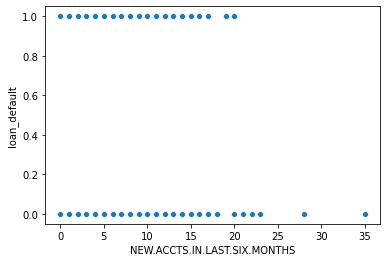

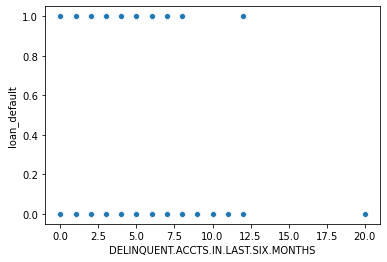

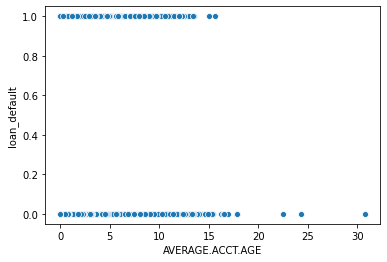

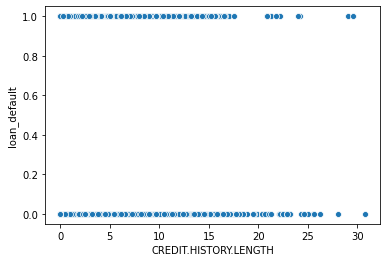

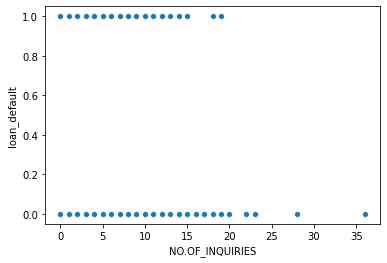

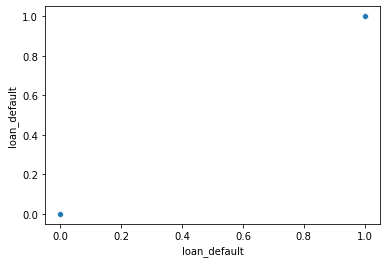

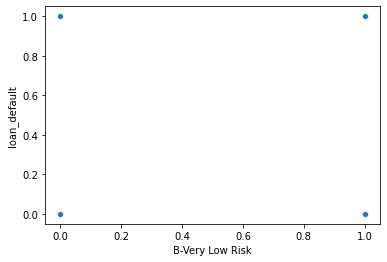

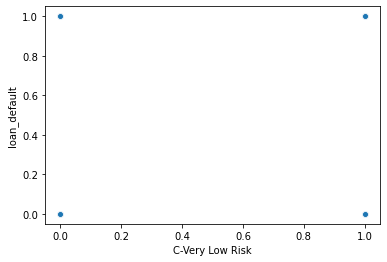

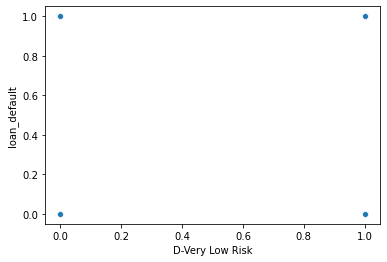

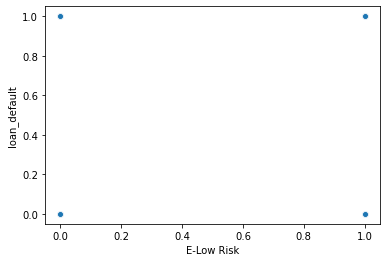

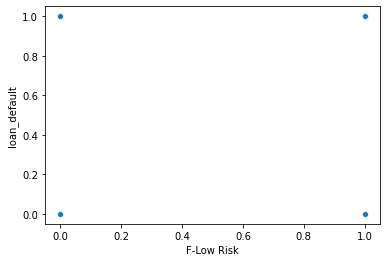

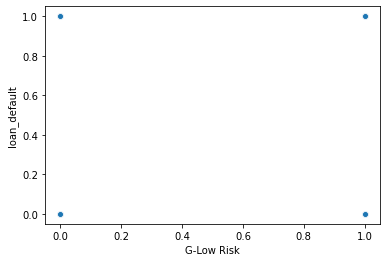

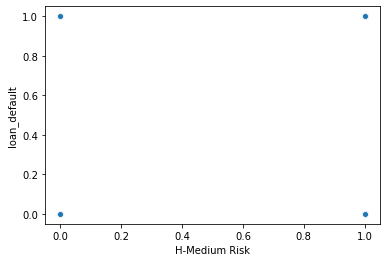

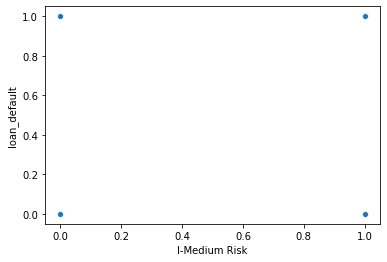

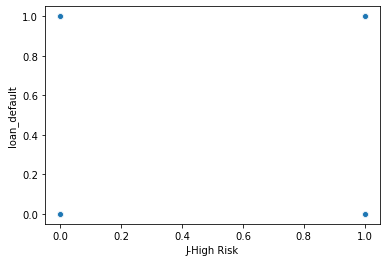

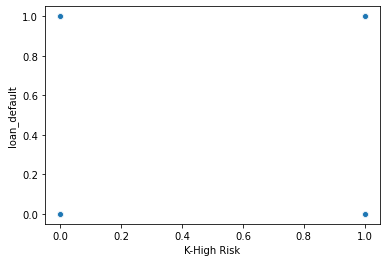

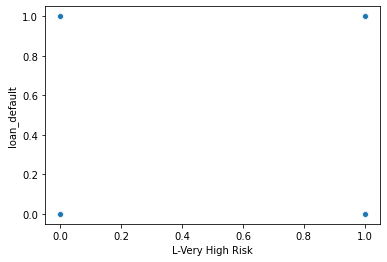

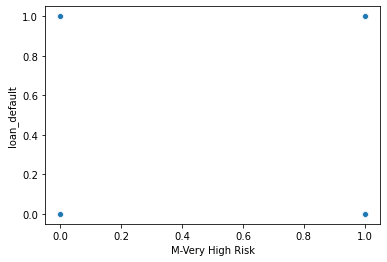

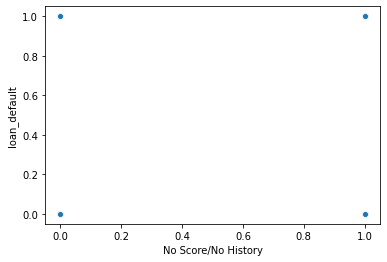

In [79]:
for col in cols_box:
    sns.scatterplot(x=df[col],y=df['loan_default']) 
    plt.show()
#testing how well each feature splits target

In [80]:
len(df[df['PERFORM_CNS.SCORE']>600])/len(df) #how many observations less than value in set

0.32359543909334465

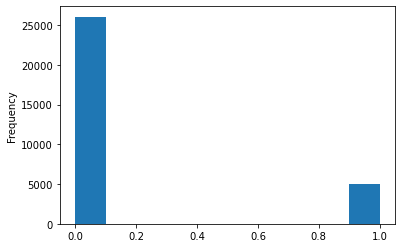

In [81]:
df.loc[(df['Employment.Type']==1)& (df['PERFORM_CNS.SCORE']>=600),'loan_default'].plot(kind='hist')

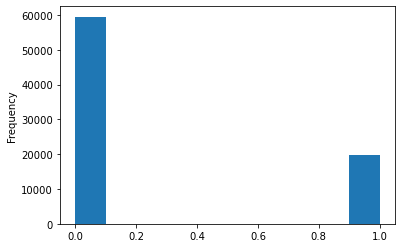

In [82]:
df.loc[(df['Employment.Type']==0)& (df['PERFORM_CNS.SCORE']<600),'loan_default'].plot(kind='hist')

## Is there a statisitically significant difference in default rates between those who are salaried and are in the top third of CNS score and those who are self employed with a lower score and what about the general population?

## One Way ANOVA test (3 groups)
## I will conduct an ANOVA test to confirm this hypothesis. In particular, for this test, we will have three groups total. The second group will be  the exact opposite of the first group, those who are self employed with a non elite CNS score (not in top third of scores). And to keep everything relative, the third group will be the general population.

In [83]:
scs.f_oneway(df.loc[(df['Employment.Type']==1)& (df['PERFORM_CNS.SCORE']>=600),'loan_default'],
df.loc[(df['Employment.Type']==0)& (df['PERFORM_CNS.SCORE']<600),'loan_default'],
df.loc[:,'loan_default'])

F_onewayResult(statistic=498.848746070614, pvalue=4.981966465281813e-217)

## Both the very large test statistic and very small p value confirm that the null hypothesis is rejected. Thus, there is a statistically significant difference in default rates between these groups.

## Feature Engineering II

In [85]:
df['Salaried_High_CNS']=np.where((df['Employment.Type']==1)& (df['PERFORM_CNS.SCORE']>=600),1,0)

In [90]:
df['Salaried_High_CNS'].value_counts()

0    171605
1     31074
Name: Salaried_High_CNS, dtype: int64

In [91]:
df['loan_default'].corr(df['Salaried_High_CNS'])

-0.06006514858155486

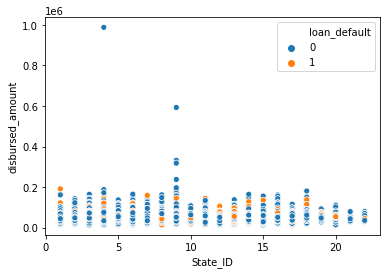

In [126]:
sns.scatterplot(x=df['State_ID'],y=df['disbursed_amount'],hue=df['loan_default'])
#Does the particular state of India matter?

In [128]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].describe()

count    202679.000000
mean          0.094257
std           0.376783
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [129]:
df['disbursed_amount'].describe()

count    202679.000000
mean      54303.388649
std       12833.183251
min       13320.000000
25%       47103.000000
50%       53703.000000
75%       60337.000000
max      987354.000000
Name: disbursed_amount, dtype: float64

In [130]:
df.loc[(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>=1)& (df['disbursed_amount']>=53703),'loan_default'].mean()

0.30039138943248533

In [131]:
df.loc[(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']<1)& (df['disbursed_amount']<53703),'loan_default'].mean()

0.18076697423862606

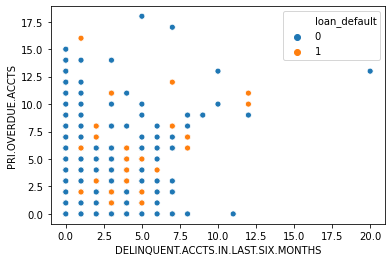

In [144]:
sns.scatterplot(x=df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],y=df['PRI.OVERDUE.ACCTS'],hue=df['loan_default'])

In [146]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].describe()

count    202679.000000
mean          0.094257
std           0.376783
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [147]:
df['PRI.OVERDUE.ACCTS'].describe()

count    202679.000000
mean          0.146878
std           0.519945
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          18.000000
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [150]:
df.loc[(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>=1)& (df['PRI.OVERDUE.ACCTS']>=1),'loan_default'].mean()

0.2980498374864572

In [151]:
df.loc[(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']<1)& (df['PRI.OVERDUE.ACCTS']<1),'loan_default'].mean()

0.21203586026860852

In [160]:
df['disbursed_amount'].describe()

count    202679.000000
mean      54303.388649
std       12833.183251
min       13320.000000
25%       47103.000000
50%       53703.000000
75%       60337.000000
max      987354.000000
Name: disbursed_amount, dtype: float64

In [357]:
#df['High_risk_High_loan']=np.where((df.High_risk==1)&(df.disbursed_amount>60000),1,0)

In [167]:
df['High_risk_High_loan'].value_counts()

0    200082
1      2597
Name: High_risk_High_loan, dtype: int64

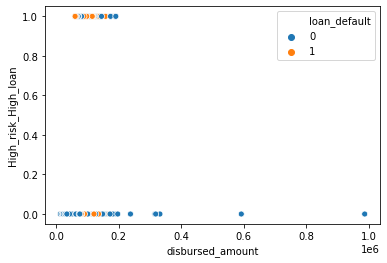

In [168]:
sns.scatterplot(x=df.disbursed_amount,y=df.High_risk_High_loan,hue=df.loan_default)
#how well new feature seperates target variable

In [172]:
df.columns #updated col list

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [203]:
corrs_dict={}
for col in df.columns:
    try:
        corr=df['loan_default'].corr(df[col])
    except TypeError:
        pass
    finally:
        corrs_dict[corr]=col
sorted(corrs_dict.items(),reverse=True) #correlations with target for each feature sorted

[(0.09865138442456285, 'ltv'),
 (nan, 'MobileNo_Avl_Flag'),
 (1.0, 'loan_default'),
 (0.07868482558182581, 'disbursed_amount'),
 (0.05166337891781657, 'State_ID'),
 (0.04529642461880197, 'VoterID_flag'),
 (0.04328621132149596, 'NO.OF_INQUIRIES'),
 (0.040154835787106345, 'M-Very High Risk'),
 (0.039927526668597856, 'PRI.OVERDUE.ACCTS'),
 (0.034648380479632236, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'),
 (0.03378281467026905, 'UniqueID'),
 (0.03315508165348842, 'No Score/No History'),
 (0.03211410100190991, 'High_risk_High_loan'),
 (0.03036924810394667, 'branch_id'),
 (0.02859220470520207, 'Date.of.Birth'),
 (0.02749808985196973, 'K-High Risk'),
 (0.026514159590324732, 'supplier_id'),
 (0.02167992082929982, 'Employee_code_ID'),
 (0.021673361853525686, 'I-Medium Risk'),
 (0.014568230859666574, 'asset_cost'),
 (0.011867232550443004, 'J-High Risk'),
 (0.01055420142651971, 'H-Medium Risk'),
 (0.008927483539690575, 'L-Very High Risk'),
 (0.002084426245183798, 'PAN_flag'),
 (-0.000219651450111830

In [183]:
len(df.loc[df['NEW.ACCTS.IN.LAST.SIX.MONTHS']>=1,:])/len(df)

0.22542049250292334

In [196]:
df['Total_Accounts']=df['PRI.NO.OF.ACCTS']+df['SEC.NO.OF.ACCTS']
#accumulating PRIMARY and Secondary Account numbers
#secondary accounts are ones where a person cosigns or coguarantees the loan

In [197]:
df['Total_Accounts'].describe() #distribution

count    202679.000000
mean          2.407960
std           5.175699
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: Total_Accounts, dtype: float64

In [201]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].describe()

count    202679.000000
mean          0.390825
std           0.970031
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          35.000000
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

## Now I'm going to create a new binary feature of people who have a high number of total accounts and also have opened a high number of new accounts relative to the means of these features

In [202]:
df['Too_many_accounts']=np.where((df['NEW.ACCTS.IN.LAST.SIX.MONTHS']>=1) & (df['Total_Accounts']>=3),1,0)

In [204]:
df['Too_many_accounts'].value_counts() #new col distrubution

0    171786
1     30893
Name: Too_many_accounts, dtype: int64

In [205]:
df['asset_cost'].describe()

count    2.026790e+05
mean     7.585588e+04
std      1.869117e+04
min      3.712900e+04
25%      6.569500e+04
50%      7.094000e+04
75%      7.932100e+04
max      1.328954e+06
Name: asset_cost, dtype: float64

In [206]:
df['ltv'].describe()

count    202679.000000
mean         74.692005
std          11.431860
min          13.500000
25%          68.850000
50%          76.700000
75%          83.580000
max          95.000000
Name: ltv, dtype: float64

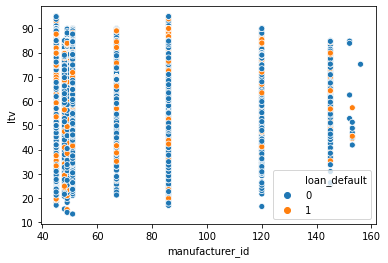

In [227]:
sns.scatterplot(x=df['manufacturer_id'],y=df['ltv'],hue=df['loan_default'])
#Does Car manufactorer affect default rates?

In [213]:
df['AVERAGE.ACCT.AGE'].describe()

count    202679.000000
mean          0.691565
std           1.183703
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          30.750000
Name: AVERAGE.ACCT.AGE, dtype: float64

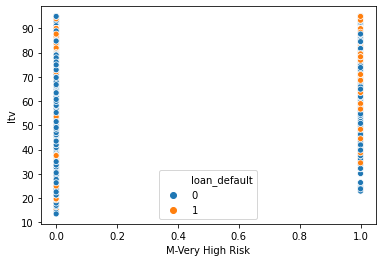

In [222]:
sns.scatterplot(x=df['M-Very High Risk'],y=df['ltv'],hue=df['loan_default'])
#Testing how those with worst CNS score, perform on repayment

In [233]:
df.loc[(df['ltv']>80) & (df['M-Very High Risk']==1),'loan_default'].mean()
#average for general pop is about .21, so much higher

0.353132099967543

In [234]:
df['ltv_risk']=np.where((df['ltv']>=80)| (df['M-Very High Risk']==1),1,0)
#worth creating a new feature

In [235]:
df['ltv_risk'].value_counts()

0    127618
1     75061
Name: ltv_risk, dtype: int64

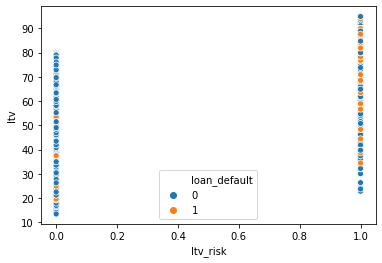

In [247]:
sns.scatterplot(x=df['ltv_risk'],y=df['ltv'],hue=df['loan_default'])
#how new feature splits classes

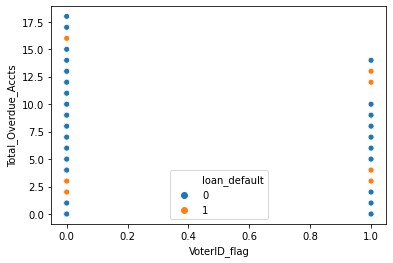

In [269]:
sns.scatterplot(x=df['VoterID_flag'],y=df['Total_Overdue_Accts'],hue=df['loan_default'])
#testing how these features split classes

In [266]:
df['Total_Overdue_Accts']=df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
#combining all overdue accounts

In [270]:
df['Total_Overdue_Accts'].describe()

count    202679.000000
mean          0.153903
std           0.535437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          18.000000
Name: Total_Overdue_Accts, dtype: float64

In [271]:
df.loc[(df['Total_Overdue_Accts']>=1) & (df['VoterID_flag']==1),'loan_default'].mean()

0.3338289962825279

In [272]:
df.loc[(df['Total_Overdue_Accts']<1) & (df['VoterID_flag']==0),'loan_default'].mean()

0.20496715605453927

In [273]:
df['Voter_ID_Overdue_accts']=np.where((df['Total_Overdue_Accts']>=1) & (df['VoterID_flag']==1),1,0)

In [274]:
df['Voter_ID_Overdue_accts'].value_counts() #new feature distribution

0    199989
1      2690
Name: Voter_ID_Overdue_accts, dtype: int64

In [325]:
corrs_dict={}
for col in df.columns:
    try:
        corr=df['loan_default'].corr(df[col])
    except TypeError:
        pass
    finally:
        corrs_dict[corr]=col
sorted(corrs_dict.items(),reverse=True) #corrs for all feats

[(0.09865138442456285, 'ltv'),
 (nan, 'MobileNo_Avl_Flag'),
 (1.0, 'loan_default'),
 (0.07868482558182581, 'disbursed_amount'),
 (0.07800923886675715, 'ltv_risk'),
 (0.05166337891781657, 'State_ID'),
 (0.04529642461880197, 'VoterID_flag'),
 (0.04328621132149596, 'NO.OF_INQUIRIES'),
 (0.040154835787106345, 'M-Very High Risk'),
 (0.039927526668597856, 'PRI.OVERDUE.ACCTS'),
 (0.03872758757134032, 'Total_Overdue_Accts'),
 (0.034648380479632236, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'),
 (0.03378281467026905, 'UniqueID'),
 (0.03315508165348842, 'No Score/No History'),
 (0.03211410100190991, 'High_risk_High_loan'),
 (0.031931808062561726, 'Voter_ID_Overdue_accts'),
 (0.03050982194857841, 'Age_Deliquent'),
 (0.03036924810394667, 'branch_id'),
 (0.02859220470520207, 'Date.of.Birth'),
 (0.02749808985196973, 'K-High Risk'),
 (0.026514159590324732, 'supplier_id'),
 (0.02167992082929982, 'Employee_code_ID'),
 (0.021673361853525686, 'I-Medium Risk'),
 (0.014568230859666574, 'asset_cost'),
 (0.0118672

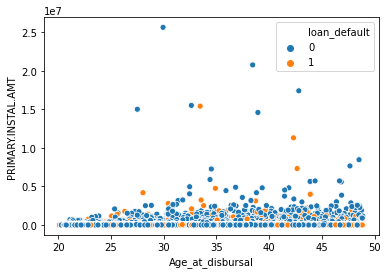

In [298]:
sns.scatterplot(x=df['Age_at_disbursal'],y=df['PRIMARY.INSTAL.AMT'],hue=df['loan_default'])
#test

In [288]:
df.columns #current cols

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [328]:
df.shape #current dataset 

(202679, 62)

In [329]:
df.isna().any().sum() #cofnirming no nulls or missing vals

0

In [337]:
for col in df.columns:
    print(f'{col}: {df[col].dtype}') #dtypes for each feature

UniqueID: int64
disbursed_amount: int64
asset_cost: int64
ltv: float64
branch_id: int64
supplier_id: int64
manufacturer_id: int64
Current_pincode_ID: int64
Date.of.Birth: datetime64[ns]
Employment.Type: int64
DisbursalDate: datetime64[ns]
State_ID: int64
Employee_code_ID: int64
MobileNo_Avl_Flag: int64
Aadhar_flag: int64
PAN_flag: int64
VoterID_flag: int64
Driving_flag: int64
Passport_flag: int64
PERFORM_CNS.SCORE: int64
PRI.NO.OF.ACCTS: int64
PRI.ACTIVE.ACCTS: int64
PRI.OVERDUE.ACCTS: int64
PRI.CURRENT.BALANCE: int64
PRI.SANCTIONED.AMOUNT: int64
PRI.DISBURSED.AMOUNT: int64
SEC.NO.OF.ACCTS: int64
SEC.ACTIVE.ACCTS: int64
SEC.OVERDUE.ACCTS: int64
SEC.CURRENT.BALANCE: int64
SEC.SANCTIONED.AMOUNT: int64
SEC.DISBURSED.AMOUNT: int64
PRIMARY.INSTAL.AMT: int64
SEC.INSTAL.AMT: int64
NEW.ACCTS.IN.LAST.SIX.MONTHS: int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: int64
AVERAGE.ACCT.AGE: float64
CREDIT.HISTORY.LENGTH: float64
NO.OF_INQUIRIES: int64
loan_default: int64
B-Very Low Risk: int64
C-Very Low Ri

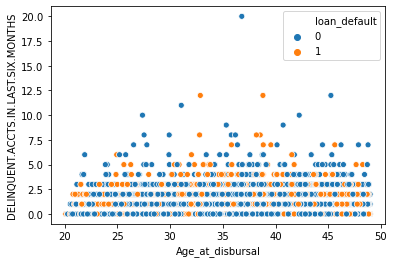

In [315]:
sns.scatterplot(x=df['Age_at_disbursal'],y=df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],hue=df['loan_default'])

### Adding Interaction between Deliquent Accounts and Age because above scatterplot implies that age and deliquent accounts have a relationship with each other and target.

In [322]:
df['Age_Deliquent']=df['Age_at_disbursal']*df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

In [323]:
df['Age_Deliquent'].describe()

count    202679.000000
mean          3.312771
std          13.695090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         735.945205
Name: Age_Deliquent, dtype: float64

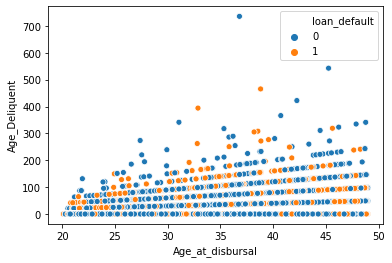

In [327]:
sns.scatterplot(x=df['Age_at_disbursal'],y=df['Age_Deliquent'],hue=df.loan_default)

In [330]:
df.to_csv('Cleaned_Loan_Dataset.csv') #saving final csv for further EDA and model building 

In [364]:
df.columns #confirming new csv cols

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [359]:
df.shape #confirming new csv shape matches dataset

(202679, 62)